In [143]:
# Importing all modules required

import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.mlab as mlab
from scipy.stats import norm
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [144]:
with open('sat1_sspa.txt') as f:
    data = f.readlines()


In [146]:
columns = ['Year','Day','Hour','Minutes','Seconds','Milliseconds','unknown']
positive_value = ['ON','TRUE','OVER','UNLOCK','SEL','ANT-1']

rows = []
c = 0
for i in data:
    if '_' in i:
        columns.append(i.strip())
    elif len(i.split("\t"))>5:
        new_list = [j.strip() for j in i.split("\t") if j not in ['',0,'\n']]
        date = new_list[0].split(' ')
        date_string = str(date[1]) + " " +  str(date[0]) + " " +  str(date[2]) + " " +  str(date[3]) + " " +  str(date[4]) + " " +  str(date[5])
        date_object = datetime.strptime(date_string, "%j %Y %H %M %S %f")
        new_list = new_list[1:]
        date_str = date_object.strftime("%Y-%m-%d %H %M %S %f")
        new_list.insert(0, date[-1])
        new_list.insert(0, date_object)
        
        for j in range(6,len(new_list),1):
            if new_list[j] in positive_value:
                new_list[j] = '1'
            else: 
                new_list[j] = '0'
            
        rows.append(new_list)

rows = rows[30:]
        

        

In [147]:
columns = ['Date']+columns[6:]
print(columns)

['Date', 'unknown', 'BAT_VOL_R_FINE', 'BAT_VOL_R_COARSE', 'BUS_VOL', 'BAT_VOL_M_FINE', 'BAT_VOL_M_COARSE', 'BAT_CUR_COARSE', 'BAT_CUR_FINE', 'SA_CUR', 'DER_RATE_PCH', 'DER_RATE_ROL', 'DER_RATE_YAW', 'PROC_ERR_PCH', 'PROC_ERR_ROL', 'PROC_ERR_YAW', 'X-TRANSMITTER_(VD01)', 'X-SSPA_SINK_PLT_(VD0', 'MEP_EXE', 'SSPA_ON_STS', 'DATA_TX_LOCK_STS', 'XBS_ANT_SEL_STS', 'MEP_EXE_STS', 'DATA_TX_ON_STS', 'PLD_TX-1_SEL_STS', 'SSPA_SEL_STS']


In [150]:
#Create the dataframe
df = pd.DataFrame()    
for j in range(len(columns)):
    col_data = []
    for i in rows:
        if type(i[j]) == str and i[j].strip() == '':
            i[j] = 0
        if j >= 1:
            col_data.append(float(i[j]))
        else: 
            col_data.append(i[j])
    df[columns[j]] = col_data
    
#Set date as index for dataframe
df.set_index('Date', inplace=True)
original_df = df.copy()

In [151]:
# Display the df (Optional)
display(df)

,unknown,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:04:53.336,8.0,41.06,41.02,40.975,41.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:53.848,9.0,41.06,41.02,40.975,41.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:54.360,10.0,41.06,41.02,40.975,41.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.384,12.0,41.06,41.02,40.975,41.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.896,13.0,41.06,41.02,40.975,41.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,19.0,40.84,40.80,40.975,40.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,20.0,40.84,40.80,40.975,40.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,21.0,40.84,40.80,40.975,40.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [152]:
# Normalization


# Min-max 
for column in df:    
    #Only normalize if non digital value
    if df[column].max() != 1 and df[column].min() != 0:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())    
        
display(df)


,unknown,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:04:53.336,8.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:53.848,9.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:54.360,10.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.384,12.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.896,13.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,19.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,20.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,21.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [153]:
for column in df.columns:
    #Fill all Nan with 0
    df[column] = df[column].fillna(0)
    
display(df)

,unknown,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:04:53.336,8.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:53.848,9.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:54.360,10.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.384,12.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.896,13.0,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,19.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,20.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,21.0,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [154]:
df = df.drop('unknown', axis=1)

In [155]:
# Principal Component analysis
display(df)
pca = PCA()
pca.fit_transform(df)
pca.explained_variance_ratio_

,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,DER_RATE_ROL,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:04:53.336,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:53.848,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:54.360,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.384,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.896,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


array([4.74537556e-01, 2.53300130e-01, 1.80152270e-01, 4.96679194e-02,
       3.84170222e-02, 1.88541625e-03, 1.28076112e-03, 4.04463562e-04,
       1.38829794e-04, 1.15824111e-04, 8.08670529e-05, 1.89403662e-05,
       1.61901196e-35, 4.40929503e-36, 2.45765759e-36, 5.77873579e-37,
       3.13557844e-37, 1.11405194e-37, 1.05083417e-38, 6.82287441e-40,
       2.56290500e-68, 9.96747987e-70, 4.81031380e-70, 1.48017843e-70])

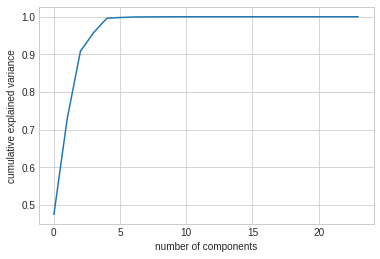

In [156]:
# PCA Plot 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [157]:
# Prinicpal components required to cover 99% of data
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(df) # this will fit and reduce dimensions
print('Number of Prinicpal components required to cover 99% of data: ',pca.n_components_)
display(df)

Number of Prinicpal components required to cover 99% of data:  5


,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,DER_RATE_ROL,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-15 00:04:53.336,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:53.848,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:54.360,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.384,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2018-05-15 00:04:55.896,0.924632,0.977302,0.978495,0.836920,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-16 23:59:56.936,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.448,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2018-06-16 23:59:57.960,0.884191,0.963035,0.978495,0.807475,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


BAT_VOL_R_FINE vs BAT_VOL_R_COARSE


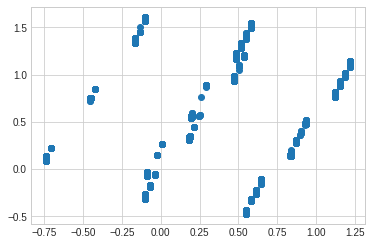

<Figure size 648x504 with 0 Axes>

BAT_VOL_R_COARSE vs BUS_VOL


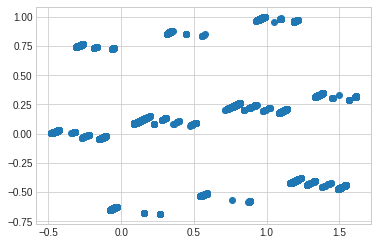

<Figure size 648x504 with 0 Axes>

BUS_VOL vs BAT_VOL_M_FINE


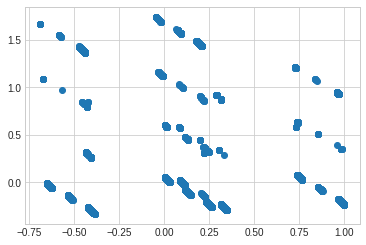

<Figure size 648x504 with 0 Axes>

BAT_VOL_M_FINE vs BAT_VOL_M_COARSE


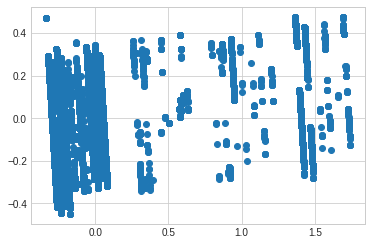

<Figure size 648x504 with 0 Axes>

In [158]:
#Plotting PC1 vs Pc2, PC2 vs PC3 etc..
for i in range(pca.n_components_ -1):
    plot = plt.scatter(X_pca[:,i], X_pca[:,(i+1)])
    print(df.columns[i]+' vs '+ df.columns[i+1])
    plt.figure(figsize=(9, 7))
    plt.show()

In [159]:
#Dataframe with PCA Values
pd.DataFrame(pca.components_, columns = df.columns)

,BAT_VOL_R_FINE,BAT_VOL_R_COARSE,BUS_VOL,BAT_VOL_M_FINE,BAT_VOL_M_COARSE,BAT_CUR_COARSE,BAT_CUR_FINE,SA_CUR,DER_RATE_PCH,DER_RATE_ROL,...,X-TRANSMITTER_(VD01),X-SSPA_SINK_PLT_(VD0,MEP_EXE,SSPA_ON_STS,DATA_TX_LOCK_STS,XBS_ANT_SEL_STS,MEP_EXE_STS,DATA_TX_ON_STS,PLD_TX-1_SEL_STS,SSPA_SEL_STS
0,-0.002971,-0.000973,-0.000476,-0.001897,0.000000e+00,3.469447e-18,0.000000e+00,2.646978e-23,6.462349e-27,0.000000e+00,...,0.0,0.0,0.285874,0.031238,-0.032385,0.638543,-0.286433,0.032274,0.000176,0.652238
1,-0.063894,-0.021702,-0.010827,-0.039366,5.551115e-17,6.938894e-18,-5.421011e-20,2.117582e-22,1.033976e-25,-1.009742e-28,...,-0.0,-0.0,0.619761,0.097928,-0.113014,-0.401891,-0.620698,0.112332,0.000070,-0.167074
2,-0.036529,-0.012414,-0.006234,-0.022465,0.000000e+00,2.775558e-17,0.000000e+00,1.694066e-21,0.000000e+00,-8.077936e-28,...,0.0,0.0,0.114110,-0.023258,0.014251,0.653537,-0.113771,-0.014038,0.000257,-0.737530
3,0.069223,0.023444,0.010569,0.042626,-1.110223e-16,1.110223e-16,-6.938894e-18,1.084202e-19,-2.117582e-22,-1.654361e-24,...,-0.0,-0.0,-0.127517,0.532485,-0.579232,0.060010,0.125664,0.580617,0.000129,-0.030184
4,-0.804694,-0.273152,-0.128968,-0.495561,6.938894e-18,1.387779e-17,8.673617e-19,-1.355253e-20,-5.293956e-23,-4.135903e-25,...,0.0,0.0,-0.067059,0.030198,-0.045205,0.005008,0.065843,0.045584,0.000238,0.041850


In [160]:
# df after reducing dimension
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns

# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names = [*set(most_important_names)]
df = df[most_important_names]
display(df)

,DATA_TX_ON_STS,MEP_EXE_STS,BAT_VOL_R_FINE,SSPA_SEL_STS
Date,,,,
2018-05-15 00:04:53.336,0.0,1.0,0.924632,1.0
2018-05-15 00:04:53.848,0.0,1.0,0.924632,1.0
2018-05-15 00:04:54.360,0.0,1.0,0.924632,1.0
2018-05-15 00:04:55.384,0.0,1.0,0.924632,1.0
2018-05-15 00:04:55.896,0.0,1.0,0.924632,1.0
...,...,...,...,...
2018-06-16 23:59:56.936,0.0,1.0,0.884191,0.0
2018-06-16 23:59:57.448,0.0,1.0,0.884191,0.0
2018-06-16 23:59:57.960,0.0,1.0,0.884191,0.0


Anomalies detected at
DatetimeIndex(['2018-05-17 20:00:00', '2018-05-17 21:00:00',
               '2018-05-17 22:00:00', '2018-06-02 15:00:00',
               '2018-06-02 16:00:00', '2018-06-04 16:00:00',
               '2018-06-04 17:00:00'],
              dtype='datetime64[ns]', name='Date', freq=None)


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

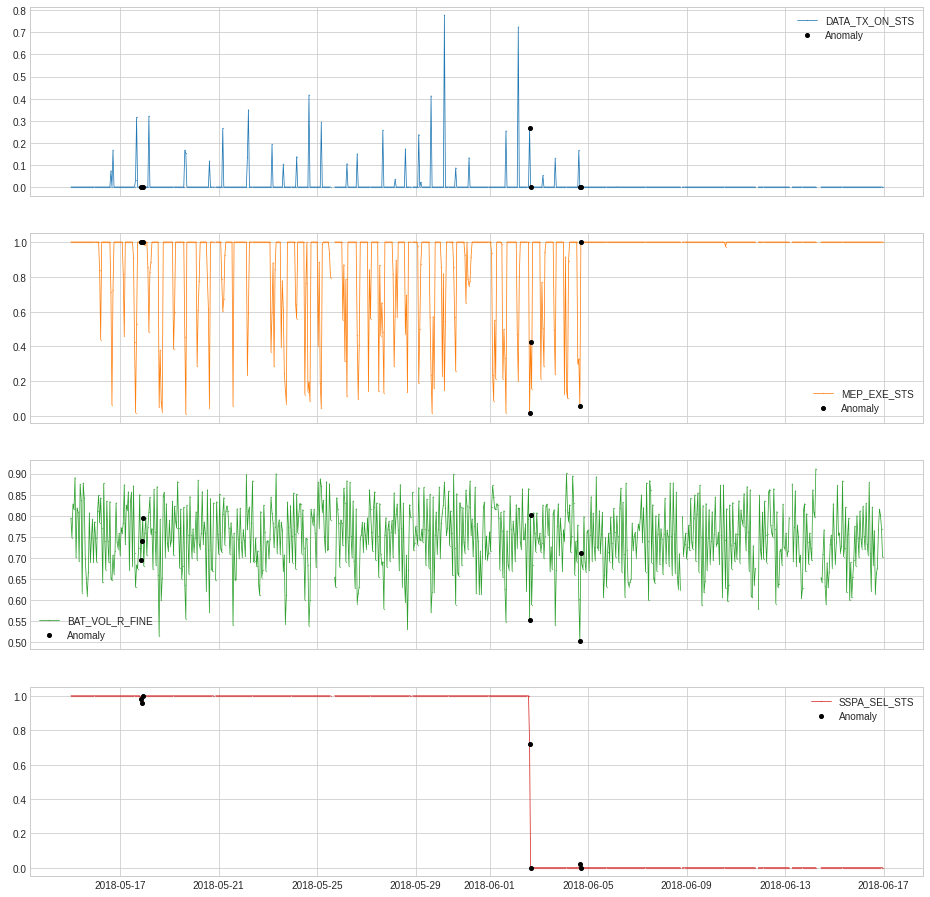

In [162]:

from adtk.detector import AutoregressionAD
from adtk.visualization import plot
from adtk.detector import CustomizedDetectorHD

df_510_r = df.resample('H').mean()
df_510_r.fillna(0)
def myDetectionFunc1(df):
    ano = pd.Series()
    for column in df.columns[1:]:
        ar = AutoregressionAD(c=3.0).fit_detect(df[column]).fillna(0).replace(0.0, False).replace(1.0, True)
        ano = ano | ar
    return ano

customized_detector = CustomizedDetectorHD(detect_func=myDetectionFunc1)
anomalies1 = customized_detector.detect(df_510_r)
print('Anomalies detected at')
print(anomalies1[anomalies1].index)
plot(df_510_r,legend=True, anomaly=anomalies1, ts_linewidth=-.75, ts_markersize=0.5, anomaly_marker='o',anomaly_tag="marker", anomaly_color='black')

